# Data Preparation

In [ ]:
# %pip install pandas numpy seaborn matplotlib scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 12.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 11.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 10.9 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 9.2 MB/s  0:00:01
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.8 MB 13.5 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.8 MB 12.8 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.8 MB 12.6 MB/s eta 0:00:01
   -------------------------------- ------- 10.5/12.8 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.8 MB 12.7 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
SAMPLE_DATA_FILE = 'C:\\Disk D\\sinusoid v9\\Predictive-Precision--main\\Predictive-Precision--main\\Early Detection of Urban Water Quality Deterioration\\NYC Drinking Water Quality\\drinking-water-quality-distribution-monitoring-data.csv'
TIME_SERIES_FILE = 'C:\\Disk D\\sinusoid v9\\Predictive-Precision--main\\Predictive-Precision--main\\Early Detection of Urban Water Quality Deterioration\\Water Quality Monitoring Dataset\\brisbane_water_quality.csv'

In [ ]:
def prepare_time_series_data(filepath):
    """
    Loads and prepares the Brisbane time-series data.
    """
    print(f"Loading time-series data from: {filepath}")
    try:
        df = pd.read_csv(filepath, low_memory=False)
    except FileNotFoundError:
        print(f"ERROR: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        print("Trying to skip bad lines...")
        try:
            with open(filepath, 'r') as f:
                for i, line in enumerate(f):
                    if 'Timestamp' in line or 'Date' in line:
                        df = pd.read_csv(filepath, skiprows=i)
                        break
            if 'df' not in locals():
                print("Could not find header row.")
                return None
        except Exception as e2:
            print(f"Second loading attempt failed: {e2}")
            return None

    print("Data loaded. Preparing...")
    
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    elif 'Date' in df.columns: 
        df['Timestamp'] = pd.to_datetime(df['Date'], errors='coerce')
    else:
        print("ERROR: No 'Timestamp' or 'Date' column found.")
        return None

    quality_cols = [col for col in df.columns if 'quality' in str(col).lower() and df[col].isna().all()]
    if quality_cols:
        print(f"Dropping empty quality columns: {quality_cols}")
        df = df.drop(columns=quality_cols)

    numeric_cols = ['Temperature', 'Dissolved Oxygen', 'pH', 'Chlorophyll', 'Turbidity', 'Salinity']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    df = df.set_index('Timestamp').dropna(subset=numeric_cols, how='all')
    print("Time-series data preparation complete.")
    return df

In [20]:
prepare_time_series_data(TIME_SERIES_FILE)

Loading time-series data from: C:\Disk D\sinusoid v9\Predictive-Precision--main\Predictive-Precision--main\Early Detection of Urban Water Quality Deterioration\Water Quality Monitoring Dataset\brisbane_water_quality.csv
Data loaded. Preparing...
Time-series data preparation complete.


,Record number,Average Water Speed,Average Water Direction,Chlorophyll,Chlorophyll [quality],Temperature,Temperature [quality],Dissolved Oxygen,Dissolved Oxygen [quality],Dissolved Oxygen (%Saturation),Dissolved Oxygen (%Saturation) [quality],pH,pH [quality],Salinity,Salinity [quality],Specific Conductance,Specific Conductance [quality],Turbidity,Turbidity [quality]
Timestamp,,,,,,,,,,,,,,,,,,,
2023-08-04 23:00:00,1468,4.834,73.484,1.621,NaN,20.018,NaN,7.472,NaN,101.175,NaN,8.176,NaN,35.215,NaN,53.262,NaN,2.068,NaN
2023-08-04 23:30:00,1469,2.544,106.424,1.959,NaN,19.986,NaN,7.455,NaN,100.884,NaN,8.175,NaN,35.209,NaN,53.254,NaN,1.994,NaN
2023-08-04 23:00:00,1470,1.260,156.755,1.620,NaN,20.001,NaN,7.430,NaN,100.571,NaN,8.171,NaN,35.207,NaN,53.252,NaN,2.030,NaN
2023-08-04 23:30:00,1471,0.760,281.754,1.761,NaN,19.983,NaN,7.419,NaN,100.398,NaN,8.171,NaN,35.211,NaN,53.257,NaN,1.973,NaN
2023-08-04 23:00:00,1472,3.397,244.637,1.635,NaN,19.986,NaN,7.429,NaN,100.538,NaN,8.171,NaN,35.208,NaN,53.253,NaN,1.944,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 08:20:00,32357,13.314,82.720,0.944,1020.0,18.607,1020.0,6.876,1020.0,87.556,1020.0,8.151,1020.0,29.268,1020.0,45.134,1020.0,3.963,1020.0
2024-06-27 08:30:00,32358,32.617,18.081,1.161,1020.0,18.551,1020.0,6.918,1020.0,87.987,1020.0,8.163,1020.0,29.254,1020.0,45.115,1020.0,3.928,1020.0
2024-06-27 08:40:00,32359,8.552,306.184,1.192,1020.0,18.558,1020.0,6.651,1020.0,84.606,1020.0,8.145,1020.0,29.250,1020.0,45.110,1020.0,4.097,1020.0


In [ ]:
def prepare_sample_data(filepath):
    """
    Loads and prepares the NYC drinking water sample data.
    """
    print(f"\nLoading sample data from: {filepath}")
    try:
        df = pd.read_csv(filepath, low_memory=False)
    except FileNotFoundError:
        print(f"ERROR: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

    print("Data loaded. Preparing...")
    
    df.columns = df.columns.str.strip()

    bacterial_cols = [col for col in df.columns if 'Coliform' in col or 'E.coli' in col]
    for col in bacterial_cols:
        df[col] = df[col].astype(str).str.replace('<1', '0', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    coliform_col = 'Coliform (Quanti-Tray) (MPN /100mL)'
    ecoli_col = 'E.coli(Quanti-Tray) (MPN/100mL)'
    
    if coliform_col in df.columns and ecoli_col in df.columns:
        df['Contaminated'] = ((df[coliform_col].fillna(0) > 0) | (df[ecoli_col].fillna(0) > 0)).astype(int)

    numeric_cols = ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    print("Sample data preparation complete.")
    return df


In [22]:
prepare_sample_data(SAMPLE_DATA_FILE)


Loading sample data from: C:\Disk D\sinusoid v9\Predictive-Precision--main\Predictive-Precision--main\Early Detection of Urban Water Quality Deterioration\NYC Drinking Water Quality\drinking-water-quality-distribution-monitoring-data.csv
Data loaded. Preparing...
Sample data preparation complete.


,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Location,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL),Contaminated
0,32355.0,2019-10-31T00:00:00.000,8:23,24950,Compliance,"SS - IFO 1169 N/S East New York Ave, 2nd SS W/...",0.42,0.61,NaN,0.0,0.0,0
1,32320.0,2019-10-31T00:00:00.000,11:14,13550,Compliance,"SS - IFO 2015 W/S University Ave, 1st SS S/O W...",0.45,0.59,NaN,0.0,0.0,0
2,32357.0,2019-10-31T00:00:00.000,11:33,50200,Operational,"SS - IFO 93 N/S Austin Place, BTW Victory Blvd...",0.74,0.63,NaN,0.0,0.0,0
3,32353.0,2019-10-31T00:00:00.000,7:47,24650,Compliance,"SS - N/S Linden Blvd, 1st SS E/O Bristol St, 12 """,0.43,0.68,NaN,1.0,0.0,1
4,32371.0,2019-10-31T00:00:00.000,9:32,17050,Compliance,"SS - IFO 4740 E/S White Plains Rd, 1st SS N/O ...",0.51,0.55,NaN,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72704,NaN,2015-01-01T00:00:00.000,09:38,11550,Compliance,"SS - IFO 1058 S/S E Gun Hill Rd, 1st SS E/O Ho...",0.74,0.95,NaN,0.0,0.0,0
72705,NaN,2015-01-01T00:00:00.000,08:41,13850,Compliance,"SS - IFO 1778 E/S Jerome Ave, 1st SS S/O E 176...",0.59,1.08,NaN,0.0,0.0,0
72706,NaN,2015-01-01T00:00:00.000,09:07,15550,Compliance,"SS - IFO 2499 W/S Grand Ave, 1st SS S/O W 190t...",0.54,0.90,NaN,0.0,0.0,0
72707,NaN,2015-01-01T00:00:00.000,11:16,17550,Compliance,"SS - IFO 309 N/S E 149th St, 2nd SS W/O Courtl...",0.56,1.00,NaN,0.0,0.0,0


In [ ]:
def visualize_time_series(df_ts):
    """
    Generates and displays visualizations for the time-series data.
    """
    if df_ts is None:
        print("Skipping time-series visualization (data not loaded).")
        return

    print("\n--- Visualizing Time-Series Data ---")
    
    df_daily = df_ts.resample('D').mean()

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    sns.lineplot(data=df_daily, x=df_daily.index, y='Temperature', label='Temperature')
    plt.title('Daily Average Temperature Over Time')
    plt.ylabel('Temperature (°C)')

    plt.subplot(3, 1, 2)
    sns.lineplot(data=df_daily, x=df_daily.index, y='Dissolved Oxygen', label='Dissolved Oxygen', color='blue')
    plt.title('Daily Average Dissolved Oxygen Over Time')
    plt.ylabel('DO (mg/L)')

    plt.subplot(3, 1, 3)
    sns.lineplot(data=df_daily, x=df_daily.index, y='Turbidity', label='Turbidity', color='green')
    plt.title('Daily Average Turbidity Over Time')
    plt.ylabel('Turbidity (NTU)')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    corr = df_ts.select_dtypes(include=np.number).corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Matrix (Time-Series Data)')
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(df_ts['Temperature'].dropna(), kde=True, color='orange')
    plt.title('Temperature Distribution')
    
    plt.subplot(1, 3, 2)
    sns.histplot(df_ts['Dissolved Oxygen'].dropna(), kde=True, color='blue')
    plt.title('Dissolved Oxygen Distribution')

    plt.subplot(1, 3, 3)
    sns.histplot(df_ts['pH'].dropna(), kde=True, color='purple')
    plt.title('pH Distribution')
    plt.tight_layout()
    plt.show()


def visualize_sample_data(df_samples):
    """
    Generates and displays visualizations for the sample data.
    """
    if df_samples is None:
        print("Skipping sample data visualization (data not loaded).")
        return

    print("\n--- Visualizing Sample Data ---")
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_samples, x='Sample class', palette='viridis')
    plt.title('Count of Sample Classes')
    
    if 'Contaminated' in df_samples.columns:
        plt.subplot(1, 2, 2)
        sns.countplot(data=df_samples, x='Contaminated', palette='Set1')
        plt.title('Count of Contaminated Samples (Coliform or E.coli > 0)')
        plt.xticks([0, 1], ['Not Contaminated', 'Contaminated'])
    plt.tight_layout()
    plt.show()

    df_sample_subset = df_samples.sample(n=min(5000, len(df_samples)))
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_sample_subset,
        x='Residual Free Chlorine (mg/L)',
        y='Turbidity (NTU)',
        hue='Sample class',
        alpha=0.5,
        s=50
    )
    plt.title('Chlorine vs. Turbidity (Sample of 5000 points)')
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_samples, x='Sample class', y='Residual Free Chlorine (mg/L)', palette='pastel')
    plt.title('Chlorine Levels by Sample Class')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_samples, x='Sample class', y='Turbidity (NTU)', palette='pastel')
    plt.title('Turbidity Levels by Sample Class')
    plt.tight_layout()
    plt.show()
    
    if 'Contaminated' in df_samples.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_samples, x='Contaminated', y='Residual Free Chlorine (mg/L)')
        plt.title('Chlorine Levels for Contaminated vs. Non-Contaminated')
        plt.xticks([0, 1], ['Not Contaminated', 'Contaminated'])
        plt.show()

Loading time-series data from: C:\Disk D\sinusoid v9\Predictive-Precision--main\Predictive-Precision--main\Early Detection of Urban Water Quality Deterioration\Water Quality Monitoring Dataset\brisbane_water_quality.csv
Data loaded. Preparing...
Time-series data preparation complete.

--- Visualizing Time-Series Data ---


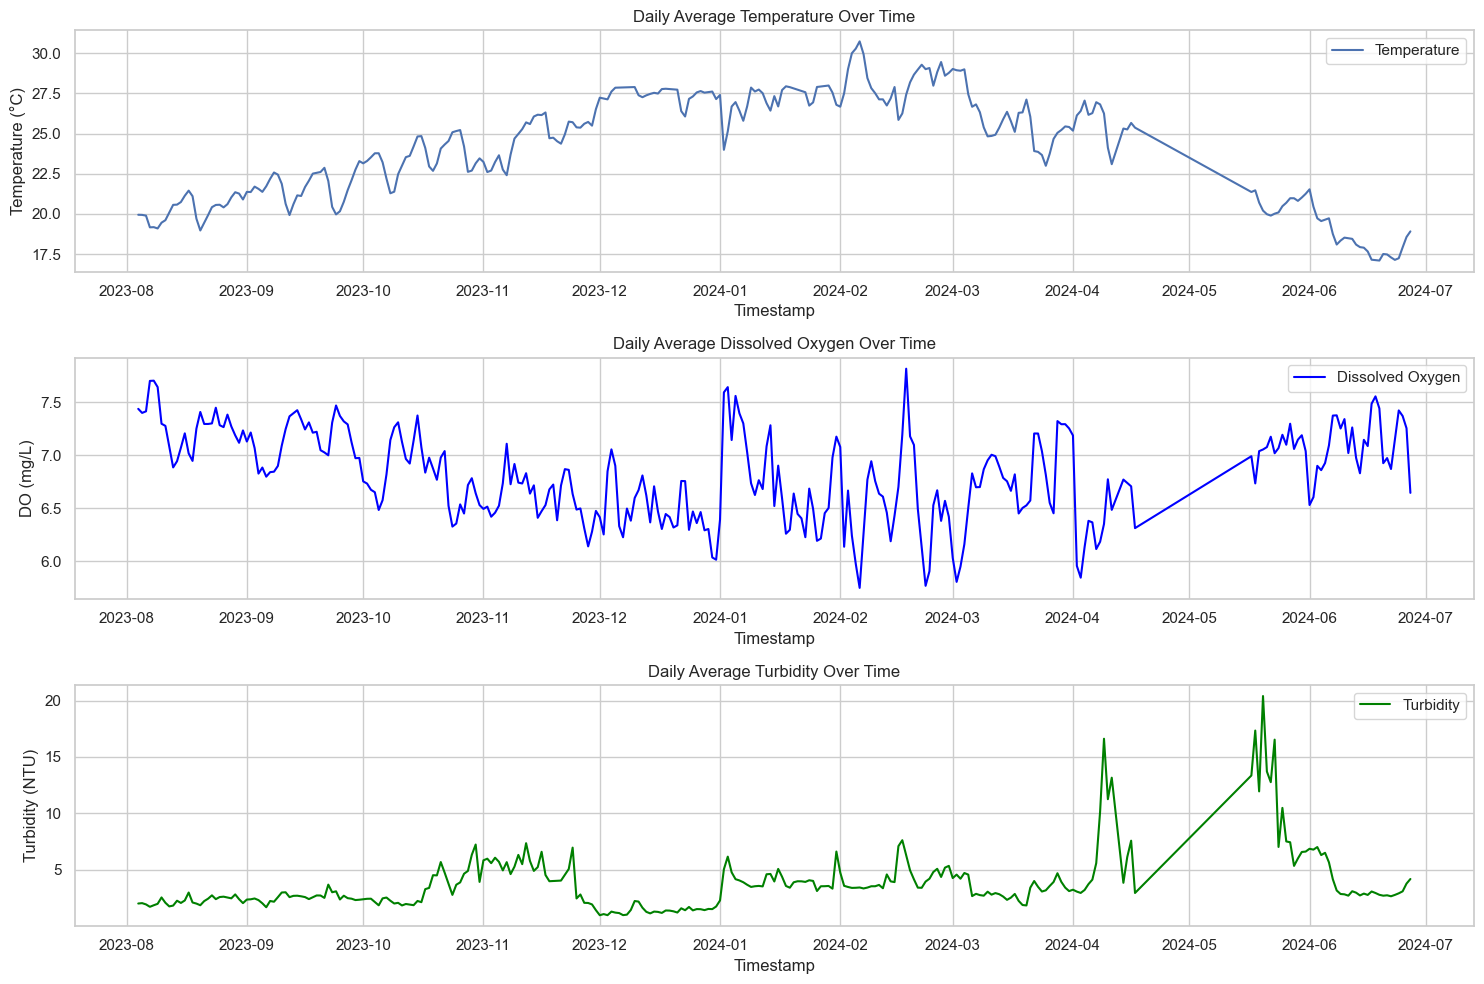

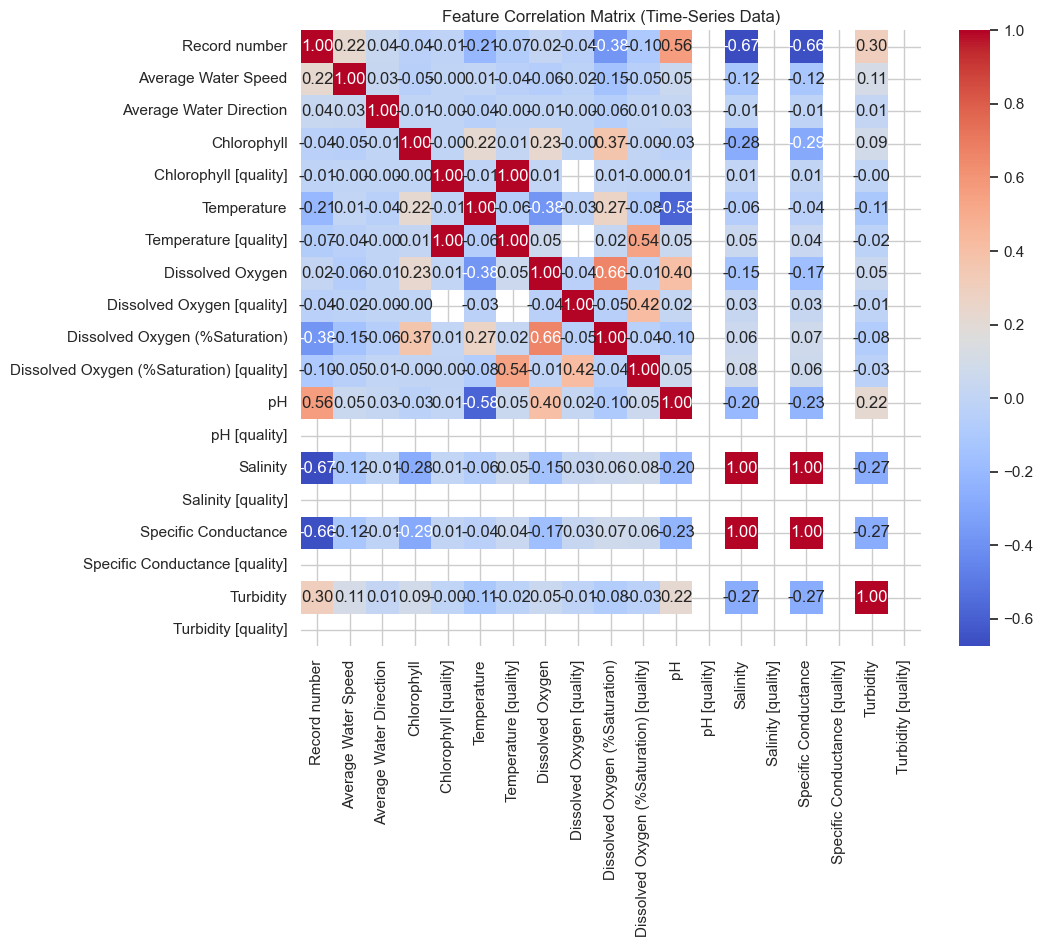

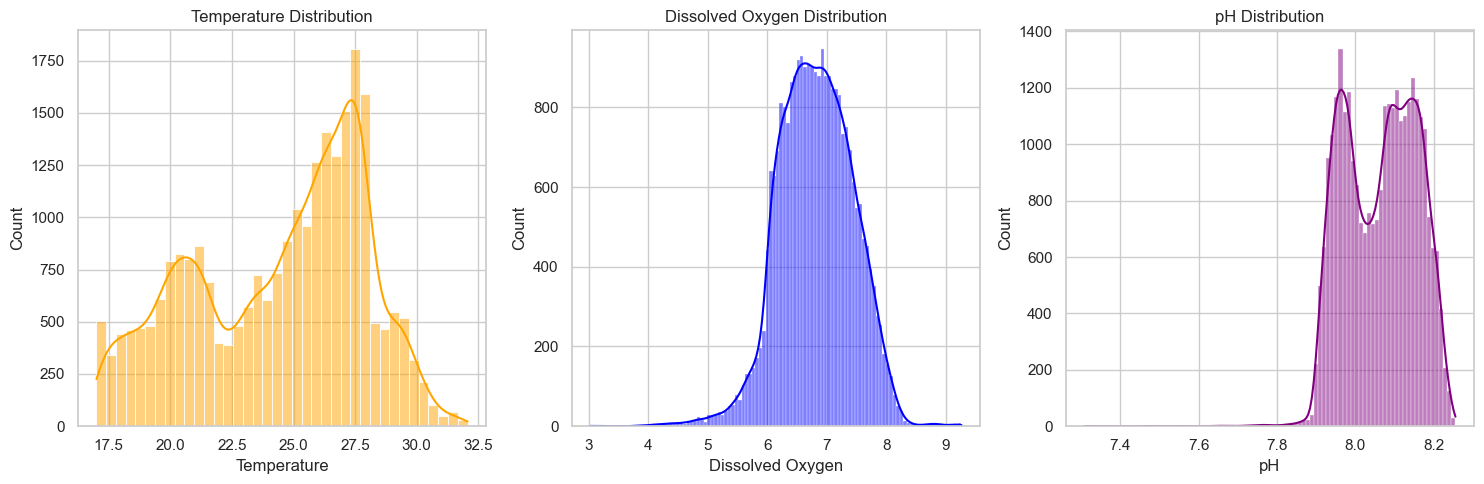


Loading sample data from: C:\Disk D\sinusoid v9\Predictive-Precision--main\Predictive-Precision--main\Early Detection of Urban Water Quality Deterioration\NYC Drinking Water Quality\drinking-water-quality-distribution-monitoring-data.csv
Data loaded. Preparing...
Sample data preparation complete.

--- Visualizing Sample Data ---


C:\Users\Vasu\AppData\Local\Temp\ipykernel_26704\3490665366.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_samples, x='Sample class', palette='viridis')
C:\Users\Vasu\AppData\Local\Temp\ipykernel_26704\3490665366.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_samples, x='Contaminated', palette='Set1')


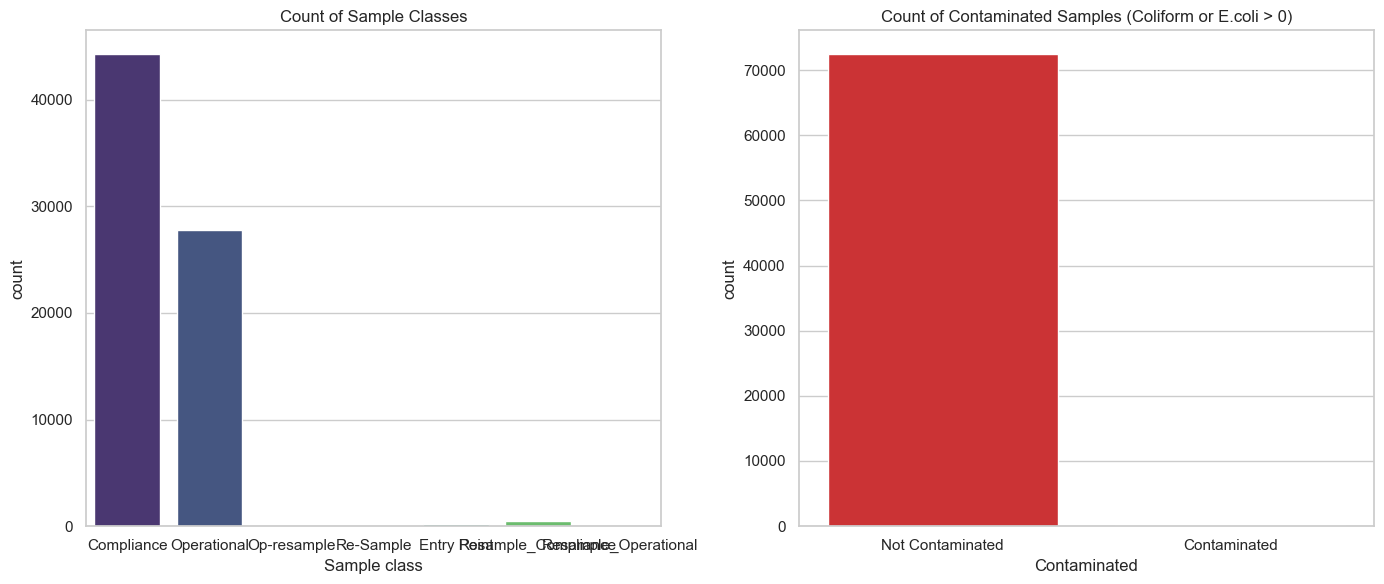

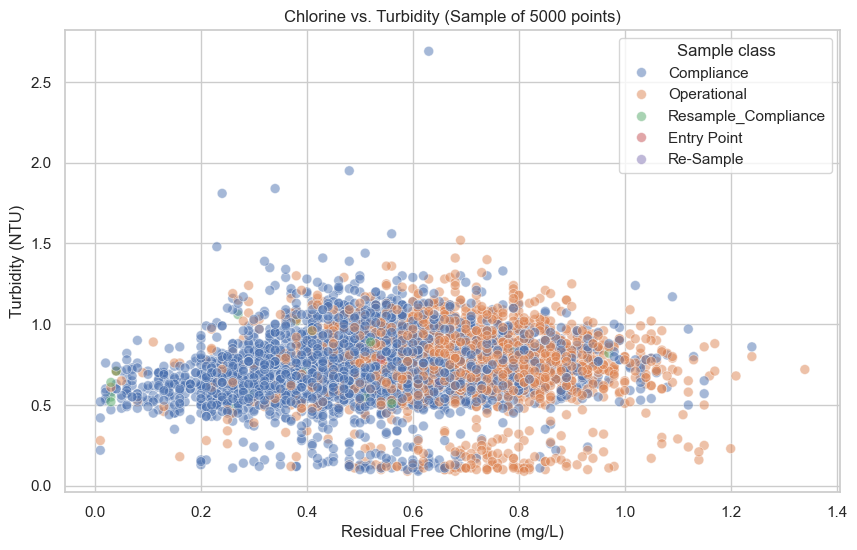

C:\Users\Vasu\AppData\Local\Temp\ipykernel_26704\3490665366.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_samples, x='Sample class', y='Residual Free Chlorine (mg/L)', palette='pastel')
C:\Users\Vasu\AppData\Local\Temp\ipykernel_26704\3490665366.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_samples, x='Sample class', y='Turbidity (NTU)', palette='pastel')


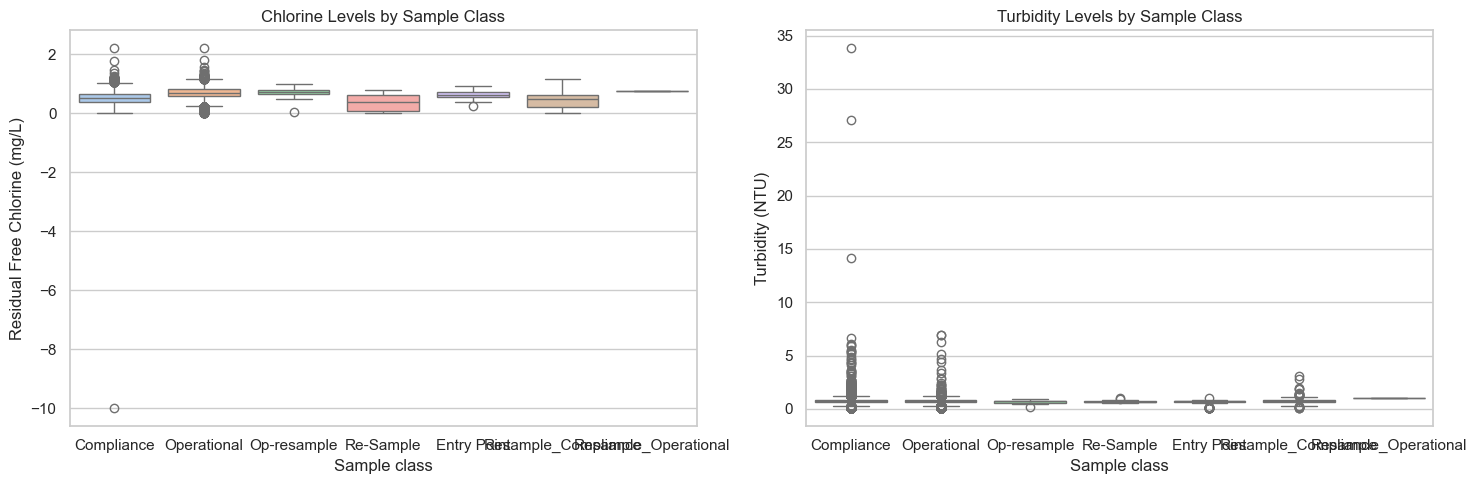

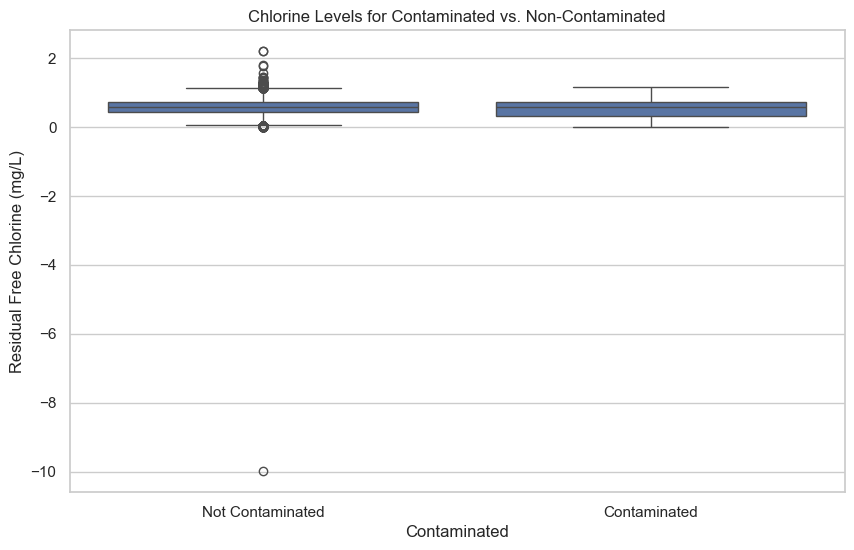

In [ ]:
sns.set_theme(style="whitegrid")
    
df_ts = prepare_time_series_data(TIME_SERIES_FILE)
visualize_time_series(df_ts)
    
df_samples = prepare_sample_data(SAMPLE_DATA_FILE)
visualize_sample_data(df_samples)

## Models

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### - NYC Sample Data Models (Classification & Regression)
        - Classification: Random Forest to predict if water is contaminated.
        - Regression: Gradient Boosting to optimize Residual Free Chlorine levels.

In [ ]:
df_nyc = pd.read_csv(SAMPLE_DATA_FILE, low_memory=False)

df_nyc.columns = df_nyc.columns.str.strip()
for col in ['Coliform (Quanti-Tray) (MPN /100mL)', 'E.coli(Quanti-Tray) (MPN/100mL)']:
    if col in df_nyc.columns:
        df_nyc[col] = pd.to_numeric(df_nyc[col].astype(str).str.replace('<1', '0', regex=False), errors='coerce').fillna(0)

df_nyc['is_contaminated'] = ((df_nyc.get('Coliform (Quanti-Tray) (MPN /100mL)', 0) > 0) | 
                             (df_nyc.get('E.coli(Quanti-Tray) (MPN/100mL)', 0) > 0)).astype(int)


numeric_features = ['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)']
for col in numeric_features:
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce')

print("\n--- NYC Model A: Contamination Classification (Random Forest) ---")

X_cls = df_nyc[numeric_features]
y_cls = df_nyc['is_contaminated']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

clf_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
)

clf_pipeline.fit(X_train_c, y_train_c)
y_pred_c = clf_pipeline.predict(X_test_c)

print("Classification Report:\n", classification_report(y_test_c, y_pred_c))

print("\n--- NYC Model B: Chlorine Optimization (Gradient Boosting) ---")

reg_features = ['Turbidity (NTU)', 'Fluoride (mg/L)']
X_reg = df_nyc[reg_features]
y_reg = df_nyc['Residual Free Chlorine (mg/L)']

mask = ~y_reg.isna()
X_reg, y_reg = X_reg[mask], y_reg[mask]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
)

reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)
print(f"Regression RMSE: {rmse:.4f} mg/L")
print(f"Regression R2 Score: {r2:.4f}")


--- NYC Model A: Contamination Classification (Random Forest) ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     14494
           1       0.01      0.06      0.01        48

    accuracy                           0.97     14542
   macro avg       0.50      0.52      0.50     14542
weighted avg       0.99      0.97      0.98     14542


--- NYC Model B: Chlorine Optimization (Gradient Boosting) ---
Regression RMSE: 0.1955 mg/L
Regression R2 Score: 0.1036


In [29]:
sample_input_A = pd.DataFrame([[0.2, 3.5, 0.7]], 
                              columns=['Residual Free Chlorine (mg/L)', 'Turbidity (NTU)', 'Fluoride (mg/L)'])

prediction_A = clf_pipeline.predict(sample_input_A)
print(f"Prediction A (0=Safe, 1=Contaminated): {prediction_A[0]}")

Prediction A (0=Safe, 1=Contaminated): 0


In [30]:
sample_input_B = pd.DataFrame([[5.0, 0.8]], 
                              columns=['Turbidity (NTU)', 'Fluoride (mg/L)'])

prediction_B = reg_pipeline.predict(sample_input_B)
print(f"Prediction B (Required Chlorine mg/L): {prediction_B[0]:.2f}")

Prediction B (Required Chlorine mg/L): 0.58


### - Brisbane Time-Series Models (Forecasting & Anomaly Detection)
        - Forecasting: Random Forest Regressor to predict next day's Dissolved Oxygen.
        - Anomaly Detection: Isolation Forest to find odd sensor readings.

In [ ]:
df_bris = pd.read_csv(TIME_SERIES_FILE, low_memory=False)

date_col = next((col for col in df_bris.columns if 'Timestamp' in col or 'Date' in col), None)
if date_col:
    df_bris[date_col] = pd.to_datetime(df_bris[date_col], errors='coerce')
    df_bris = df_bris.set_index(date_col).sort_index()

numeric_cols = ['Temperature', 'Dissolved Oxygen', 'Turbidity', 'pH', 'Salinity', 'Chlorophyll']
actual_cols = [c for c in numeric_cols if c in df_bris.columns]
for c in actual_cols:
    df_bris[c] = pd.to_numeric(df_bris[c], errors='coerce')

df_daily = df_bris[actual_cols].resample('D').mean().dropna()

print("\n--- Brisbane Model C: Forecasting Dissolved Oxygen (Random Forest) ---")

df_daily['Target_Next_Day_DO'] = df_daily['Dissolved Oxygen'].shift(-1)
df_model = df_daily.dropna() 

X_fc = df_model[actual_cols] 
y_fc = df_model['Target_Next_Day_DO'] 

train_size = int(len(X_fc) * 0.8)
X_train_f, X_test_f = X_fc.iloc[:train_size], X_fc.iloc[train_size:]
y_train_f, y_test_f = y_fc.iloc[:train_size], y_fc.iloc[train_size:]

fc_pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(n_estimators=100, random_state=42)
)

fc_pipeline.fit(X_train_f, y_train_f)
y_pred_f = fc_pipeline.predict(X_test_f)

print(f"Forecasting RMSE: {np.sqrt(mean_squared_error(y_test_f, y_pred_f)):.4f}")

print("\n--- Brisbane Model D: Anomaly Detection (Isolation Forest) ---")

X_anomaly = df_daily[actual_cols]

iso_forest = IsolationForest(contamination=0.05, random_state=42)

df_daily['anomaly'] = iso_forest.fit_predict(X_anomaly)

num_anomalies = (df_daily['anomaly'] == -1).sum()
print(f"Identified {num_anomalies} anomalies out of {len(df_daily)} daily records.")
print("Example Anomalies:\n", df_daily[df_daily['anomaly'] == -1].head())


--- Brisbane Model C: Forecasting Dissolved Oxygen (Random Forest) ---
Forecasting RMSE: 0.2666

--- Brisbane Model D: Anomaly Detection (Isolation Forest) ---
Identified 13 anomalies out of 252 daily records.
Example Anomalies:
             Temperature  Dissolved Oxygen  Turbidity        pH   Salinity  \
Timestamp                                                                   
2023-08-07    19.165583          7.702063   1.720875  8.176604  33.888458   
2024-01-05    26.962943          7.560397   4.167959  8.129875  29.555062   
2024-01-08    26.701484          7.028611   3.673315  8.025351  30.252030   
2024-02-06    30.744359          5.749959   3.432607  7.914966  31.288586   
2024-02-16    25.854800          6.702552   7.096083  7.902848  22.790503   

            Chlorophyll  Target_Next_Day_DO  anomaly  
Timestamp                                             
2023-08-07     1.885729            7.704354       -1  
2024-01-05     7.404742            7.028611       -1  
2024-01-0

In [32]:
sample_input_C = pd.DataFrame([[30.5, 6.5, 12.0, 8.1, 35.0, 5.5]], 
                              columns=['Temperature', 'Dissolved Oxygen', 'Turbidity', 'pH', 'Salinity', 'Chlorophyll'])

prediction_C = fc_pipeline.predict(sample_input_C)
print(f"Prediction C (Tomorrow's Dissolved Oxygen mg/L): {prediction_C[0]:.2f}")

Prediction C (Tomorrow's Dissolved Oxygen mg/L): 6.48


In [33]:
sample_input_D = pd.DataFrame([[25.0, 7.0, 2.0, 4.5, 34.0, 1.2]], 
                              columns=['Temperature', 'Dissolved Oxygen', 'Turbidity', 'pH', 'Salinity', 'Chlorophyll'])

prediction_D = iso_forest.predict(sample_input_D)
# Output: 1 = Normal, -1 = Anomaly
status = "Normal" if prediction_D[0] == 1 else "ANOMALY DETECTED"
print(f"Prediction D Status: {status}")

Prediction D Status: Normal
